In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import normalize , Normalizer

# Data set loading

In [2]:
#loading data set from colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# preprocessing

In [21]:
data = pd.read_csv("/content/drive/MyDrive/Train.csv")
data.shape
data.describe()
data = data.drop(['id','device','timestamp'],axis =1)

#chech for null values

data.isna().sum()

#caategorical 2 numerical

data_reshaped = np.array(data['area']).reshape(-1, 1)
encoder = OneHotEncoder(sparse = False )
encoded_features = encoder.fit_transform(data_reshaped)
# Create a DataFrame with one-hot encoded features
df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['area']))          #''' man this get features out is cooooollll

# Concatenate the one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, df_encoded], axis=1)
data.head(10)
# fill with mean

mean_data = data.fillna(data.mean())
mean_data = mean_data.drop('area',axis = 1)
mean_data.head(10)

#fill with median

med_data = data.fillna(data.median())
med_data = med_data.drop('area',axis =1 )
med_data.head(10)            #  '''now we have two  main datasets main_data and med_data'''

#spliting X , y

Xmean = mean_data.drop('target',axis = 1)
ymean = mean_data['target']



Xmed = med_data.drop('target',axis = 1)
ymed = med_data['target']



#normalization (it was useless)

transformer = Normalizer(norm = 'l1').fit(Xmean)
Xmeannorm = transformer.transform(Xmean)
Xmeannorm = pd.DataFrame(Xmeannorm)



transformer = Normalizer(norm = 'l1').fit(Xmed)
Xmednorm = transformer.transform(Xmed)
Xmednorm = pd.DataFrame(Xmednorm)



#train test split
Xmeantr , Xmeants , ymeantr , ymeants = train_test_split(Xmean , ymean , test_size= 0.2 , random_state = 42)
Xmedtr , Xmedts , ymedtr , ymedts = train_test_split(Xmed , ymed , test_size= 0.2 , random_state = 42)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-21-1c64c300f91d>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_data = data.fillna(data.mean())
<ipython-input-21-1c64c300f91d>:29: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med_data = data.fillna(data.median())


# learning phaze

In [22]:

#random forest on mean data

rf = RandomForestRegressor()
rf.fit(Xmeantr,ymeantr)


#random forest on med data

rf.fit(Xmedtr , ymedtr)

#prediction

ypredmean = rf.predict(Xmeants)
ypredmed = rf.predict(Xmedts)






# Evaluation phaze

In [23]:
#mse

mean_mse = mean_squared_error(ymeants , ypredmean)
med_mse = mean_squared_error(ymedts,ypredmed)

#R2

r2mean = r2_score(ymeants, ypredmean)
r2med = r2_score(ymedts,ypredmed)

print(f"Mean Squared Error for mean(MSE mean): {mean_mse:.2f}")
print(f"R-squared for mean (R2): {r2mean:.2f}")
print(f"Mean Squared Error for median(MSE median): {med_mse:.2f}")
print(f"R-squared  for med (R2): {r2med:.2f}")

Mean Squared Error for mean(MSE mean): 615116894344610.62
R-squared for mean (R2): 0.68
Mean Squared Error for median(MSE median): 107671004658676.12
R-squared  for med (R2): 0.94


# *some visualizations*

                         Feature    Importance
14    SCell_Downlink_Average_MCS  4.013030e-01
13        SCell_Downlink_Num_RBs  1.686588e-01
12                 SCell_SNR_max  1.156307e-01
3                  PCell_SNR_max  1.092615e-01
4         PCell_Downlink_Num_RBs  6.030694e-02
5     PCell_Downlink_Average_MCS  2.569270e-02
10                SCell_RSRQ_max  1.475727e-02
1                 PCell_RSRQ_max  1.293231e-02
24               precipIntensity  1.251099e-02
2                 PCell_RSSI_max  1.191929e-02
20                     Longitude  9.290527e-03
19                      Latitude  6.404472e-03
11                SCell_RSSI_max  6.209200e-03
0                 PCell_RSRP_max  5.404810e-03
9                 SCell_RSRP_max  4.530223e-03
23                           COG  4.122041e-03
21                      Altitude  4.113908e-03
7            PCell_Cell_Identity  4.076243e-03
22                     speed_kmh  3.778195e-03
16           SCell_Cell_Identity  3.257167e-03
25           

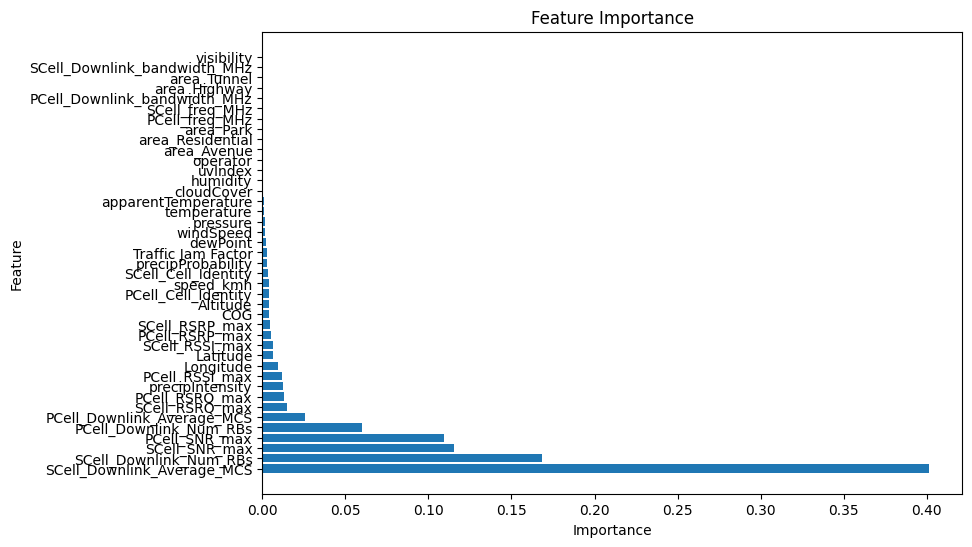

In [28]:
#Get feature importances
importances = rf.feature_importances_

# Get the names of the features
feature_names = Xmean.columns  # Assuming Xmean is your feature matrix

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))

# Increase the left margin (adjust as needed)
plt.subplots_adjust(left=0.2)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()